<a href="https://colab.research.google.com/github/adeliapebriani/Classification-and-Regression-Tree/blob/main/CART-Pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve,auc,accuracy_score

### **1. DATASET**

In [706]:
filename = 'https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Dataset/thyroid0387.data' #load data
data = pd.read_csv(filename, names=["age","sex","on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","query hypothyroid","query hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH measured","TSH","T3 measured","T3","TT4 measured","TT4","T4U measured","T4U","FTI measured","FTI","TBG measured","TBG","referral source","label"])
data.head(10) #menampilkan 10 data pertama

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S[840803047]
5,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803048]
6,77,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,21,other,-[840803068]
7,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2.6,t,116,f,?,f,?,f,?,SVI,-[840807019]
8,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.2,t,1.8,t,76,f,?,f,?,f,?,other,-[840808060]
9,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.9,t,1.7,t,83,f,?,f,?,f,?,other,-[840808073]


### **2. PREPROCESSING**

In [707]:
for i in range(0, len(data['label'])):
  if '-' in data['label'][i]:
    data['label'][i]= 0
  elif 'I' in data['label'][i]:
     data['label'][i]= 3
  elif 'J' in data['label'][i]:
     data['label'][i]= 3
  elif 'K' in data['label'][i]:
     data['label'][i]= 3
  elif 'L' in data['label'][i]:
     data['label'][i]= 3
  elif 'M' in data['label'][i]:
     data['label'][i]= 3
  elif 'N' in data['label'][i]:
     data['label'][i]= 3
  elif 'O' in data['label'][i]:
     data['label'][i]= 3
  elif 'P' in data['label'][i]:
     data['label'][i]= 3
  elif 'Q' in data['label'][i]:
     data['label'][i]= 3
  elif 'R' in data['label'][i]:
     data['label'][i]= 3
  elif 'S' in data['label'][i]:
     data['label'][i]= 3
  elif 'T' in data['label'][i]:
     data['label'][i]= 3
  
    
  elif 'A' in data['label'][i]:
     data['label'][i]= 1
  elif 'B' in data['label'][i]:
     data['label'][i]= 1
  elif 'C' in data['label'][i]:
     data['label'][i]= 1
  elif 'D' in data['label'][i]:
     data['label'][i]= 1    
     
  elif 'E' in data['label'][i]:
     data['label'][i]= 2
  elif 'F' in data['label'][i]:
     data['label'][i]= 2
  elif 'G' in data['label'][i]:
     data['label'][i]= 2
  elif 'H' in data['label'][i]:
     data['label'][i]= 2
data.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-p

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,label
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,0
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,0
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,0
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,0
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,3
5,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,0
6,77,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,21,other,0
7,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2.6,t,116,f,?,f,?,f,?,SVI,0
8,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.2,t,1.8,t,76,f,?,f,?,f,?,other,0
9,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.9,t,1.7,t,83,f,?,f,?,f,?,other,0


In [708]:
data = data[data.label != 3]

In [709]:
print("Jumlah kemunculan nilai pada atribut sex: \n", data['sex'].value_counts())
data['sex'] = data['sex'].replace('F', 0)
data['sex'] = data['sex'].replace('M', 1)
data['sex'] = data['sex'].replace('?', 0)
print("Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: \n", data['sex'].value_counts())

Jumlah kemunculan nilai pada atribut sex: 
 F    4900
M    2396
?     250
Name: sex, dtype: int64
Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: 
 0    5150
1    2396
Name: sex, dtype: int64


In [710]:
data = data.replace('?', np.nan)

In [711]:
data.isnull().sum() #menampilkan jumlah nilai null dari tiap atribut

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           722
T3 measured                     0
T3                           2209
TT4 measured                    0
TT4                           354
T4U measured                    0
T4U                           676
FTI measured                    0
FTI                           669
TBG measured                    0
TBG                          7287
referral source                 0
label         

In [712]:
print("Jumlah kemunculan nilai pada atribut on thyroxine: \n", data['on thyroxine'].value_counts())
data['on thyroxine'] = data['on thyroxine'].replace('f', 0)
data['on thyroxine'] = data['on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query on thyroxine: \n", data['query on thyroxine'].value_counts())
data['query on thyroxine'] = data['query on thyroxine'].replace('f', 0)
data['query on thyroxine'] = data['query on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut on antithyroid medication: \n", data['on antithyroid medication'].value_counts())
data['on antithyroid medication'] = data['on antithyroid medication'].replace('f', 0)
data['on antithyroid medication'] = data['on antithyroid medication'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut sick: \n", data['sick'].value_counts())
data['sick'] = data['sick'].replace('f', 0)
data['sick'] = data['sick'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut pregnant: \n", data['pregnant'].value_counts())
data['pregnant'] = data['pregnant'].replace('f', 0)
data['pregnant'] = data['pregnant'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut thyroid surgery: \n", data['thyroid surgery'].value_counts())
data['thyroid surgery'] = data['thyroid surgery'].replace('f', 0)
data['thyroid surgery'] = data['thyroid surgery'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut I131 treatment: \n", data['I131 treatment'].value_counts())
data['I131 treatment'] = data['I131 treatment'].replace('f', 0)
data['I131 treatment'] = data['I131 treatment'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hypothyroid: \n", data['query hypothyroid'].value_counts())
data['query hypothyroid'] = data['query hypothyroid'].replace('f', 0)
data['query hypothyroid'] = data['query hypothyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hyperthyroid: \n", data['query hyperthyroid'].value_counts())
data['query hyperthyroid'] = data['query hyperthyroid'].replace('f', 0)
data['query hyperthyroid'] = data['query hyperthyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut lithium: \n", data['lithium'].value_counts())
data['lithium'] = data['lithium'].replace('f', 0)
data['lithium'] = data['lithium'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut goitre: \n", data['goitre'].value_counts())
data['goitre'] = data['goitre'].replace('f', 0)
data['goitre'] = data['goitre'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut tumor: \n", data['tumor'].value_counts())
data['tumor'] = data['tumor'].replace('f', 0)
data['tumor'] = data['tumor'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut hypopituitary: \n", data['hypopituitary'].value_counts())
data['hypopituitary'] = data['hypopituitary'].replace('f', 0)
data['hypopituitary'] = data['hypopituitary'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut psych: \n", data['psych'].value_counts())
data['psych'] = data['psych'].replace('f', 0)
data['psych'] = data['psych'].replace('t', 1)

Jumlah kemunculan nilai pada atribut on thyroxine: 
 f    6699
t     847
Name: on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut query on thyroxine: 
 f    7423
t     123
Name: query on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut on antithyroid medication: 
 f    7454
t      92
Name: on antithyroid medication, dtype: int64


Jumlah kemunculan nilai pada atribut sick: 
 f    7266
t     280
Name: sick, dtype: int64


Jumlah kemunculan nilai pada atribut pregnant: 
 f    7513
t      33
Name: pregnant, dtype: int64


Jumlah kemunculan nilai pada atribut thyroid surgery: 
 f    7440
t     106
Name: thyroid surgery, dtype: int64


Jumlah kemunculan nilai pada atribut I131 treatment: 
 f    7406
t     140
Name: I131 treatment, dtype: int64


Jumlah kemunculan nilai pada atribut query hypothyroid: 
 f    7046
t     500
Name: query hypothyroid, dtype: int64


Jumlah kemunculan nilai pada atribut query hyperthyroid: 
 f    6990
t     556
Name: query hyperthyroi

In [713]:
print("Jumlah kemunculan nilai pada atribut label: \n", data['label'].value_counts())

Jumlah kemunculan nilai pada atribut label: 
 0    6771
2     593
1     182
Name: label, dtype: int64


In [714]:
data.isnull().sum()
data.shape

(7546, 30)

In [715]:
data.drop('TBG measured', inplace=True, axis=1)
data.drop('T4U measured', inplace=True, axis=1)
data.drop('TSH measured', inplace=True, axis=1)
data.drop('FTI measured', inplace=True, axis=1)
data.drop('T3 measured', inplace=True, axis=1)
data.drop('TT4 measured', inplace=True, axis=1)
data.drop('referral source', inplace=True, axis=1)
data.drop('hypopituitary', inplace=True, axis=1)
data.drop('TBG', inplace=True, axis=1)

In [716]:
data.head(10)


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,label
0,29,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.3,NaN,NaN,NaN,NaN,0
1,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128,NaN,NaN,0
2,41,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
3,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
5,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
7,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.7,2.6,116,NaN,NaN,0
8,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.2,1.8,76,NaN,NaN,0
9,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.9,1.7,83,NaN,NaN,0
10,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.9,2.3,133,NaN,NaN,0


In [717]:
column = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i in range(0, len(column)):
  data[column[i]] = data[column[i]].astype(float)

In [718]:

mean = data["age"].mean()
data["age"] = data["age"].replace(np.nan, mean)

mean = data["TSH"].mean()
data["TSH"] = data["TSH"].replace(np.nan, mean)


mean = data["T3"].mean()
data["T3"] = data["T3"].replace(np.nan, mean)
data

mean = data["TT4"].mean()
data["TT4"] = data["TT4"].replace(np.nan, mean)

mean = data["T4U"].mean()
data["T4U"] = data["T4U"].replace(np.nan, mean)

mean = data["FTI"].mean()
data["FTI"] = data["FTI"].replace(np.nan, mean)



data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,label
0,29.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.300000,2.020935,105.203373,0.967322,110.571745,0
1,29.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.600000,1.900000,128.000000,0.967322,110.571745,0
2,41.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5.421753,2.020935,105.203373,0.967322,110.571745,0
3,36.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.421753,2.020935,105.203373,0.967322,110.571745,0
5,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.421753,2.020935,105.203373,0.967322,110.571745,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.421753,2.020935,88.000000,0.740000,119.000000,0
9167,56.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,5.421753,2.020935,64.000000,0.830000,77.000000,0
9168,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5.421753,2.020935,91.000000,0.920000,99.000000,0
9170,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.421753,2.020935,75.000000,0.850000,88.000000,0


In [719]:
data = data.drop_duplicates()

In [720]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
label                        0
dtype: int64

In [721]:
data.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,label
0,29.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.300000,2.020935,105.203373,0.967322,110.571745,0
1,29.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.600000,1.900000,128.000000,0.967322,110.571745,0
2,41.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5.421753,2.020935,105.203373,0.967322,110.571745,0
3,36.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.421753,2.020935,105.203373,0.967322,110.571745,0
5,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.421753,2.020935,105.203373,0.967322,110.571745,0
6,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.421753,2.020935,105.203373,0.967322,110.571745,0
7,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.700000,2.600000,116.000000,0.967322,110.571745,0
8,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.200000,1.800000,76.000000,0.967322,110.571745,0
9,28.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.900000,1.700000,83.000000,0.967322,110.571745,0
10,54.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.900000,2.300000,133.000000,0.967322,110.571745,0


In [722]:
'''bins_T3 = [0.00,1.10,2.80,10.00]
data["T3_1"] = pd.cut(data.T3_1,bins_T3,labels=False)'''

'bins_T3 = [0.00,1.10,2.80,10.00]\ndata["T3_1"] = pd.cut(data.T3_1,bins_T3,labels=False)'

In [723]:
print('Normal')
print(len(data.query ('T3<1.2 and label==0')))
print(len(data.query ('T3>=1.2 and T3<=2.8 and label==0')))
print(len(data.query ('T3>2.8 and label==0')))
print('\n')
print('Thyroid')
print(len(data.query ('T3<1.2 and label==1')))
print(len(data.query ('T3>=1.2 and T3<=2.8 and label==1')))
print(len(data.query ('T3>2.8 and label==1')))

Normal
142
6319
224


Thyroid
0
38
144


In [724]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age                          30.00
sex                           1.00
on thyroxine                  0.00
query on thyroxine            0.00
on antithyroid medication     0.00
sick                          0.00
pregnant                      0.00
thyroid surgery               0.00
I131 treatment                0.00
query hypothyroid             0.00
query hyperthyroid            0.00
lithium                       0.00
goitre                        0.00
tumor                         0.00
psych                         0.00
TSH                           2.76
T3                            0.40
TT4                          32.00
T4U                           0.17
FTI                          28.00
label                         0.00
dtype: float64


### **OUTLIERS**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


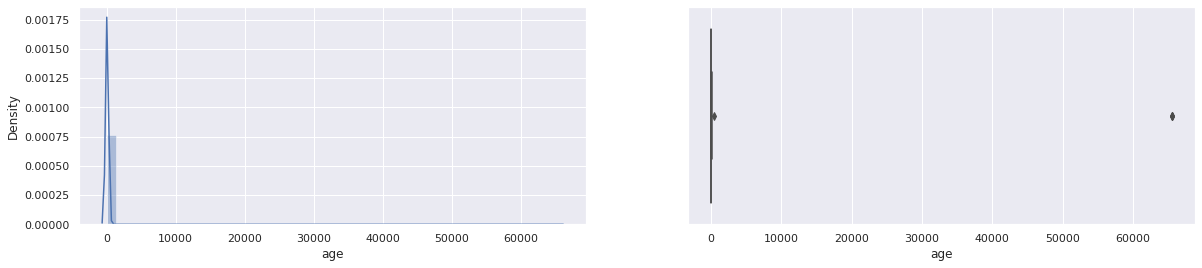

In [725]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,2,1)
sns.distplot(data['age'])

f.add_subplot(1,2,2)
sns.boxplot(data['age'])


In [726]:
indexNames = data[data['age'] > 100].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [727]:
data['age'].describe()

count    7456.000000
mean       52.011132
std        18.629106
min         1.000000
25%        37.000000
50%        55.000000
75%        67.000000
max        97.000000
Name: age, dtype: float64

In [728]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI,label
count,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.00000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000,7456.000000
mean,52.011132,0.319474,0.113197,0.016497,0.012205,0.03742,0.004426,0.014217,0.018777,0.066926,0.073632,0.011534,0.009925,0.025483,0.050563,5.425465,2.020845,105.199513,0.967305,110.570327,0.183476
std,18.629106,0.466304,0.316855,0.127385,0.109807,0.18980,0.066385,0.118391,0.135745,0.249910,0.261189,0.106784,0.099135,0.157597,0.219119,24.950154,0.685100,32.020033,0.155770,35.145559,0.555806
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.050000,2.000000,0.190000,1.400000,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.647500,1.775000,88.000000,0.880000,95.000000,0.000000
50%,55.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,2.020935,104.000000,0.967322,110.000000,0.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000,2.200000,120.000000,1.050000,123.000000,0.000000
max,97.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,18.000000,430.000000,2.120000,839.000000,2.000000


### **3. ANALISIS DATA**

In [729]:
(data['label']).value_counts()

0    6681
2     593
1     182
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


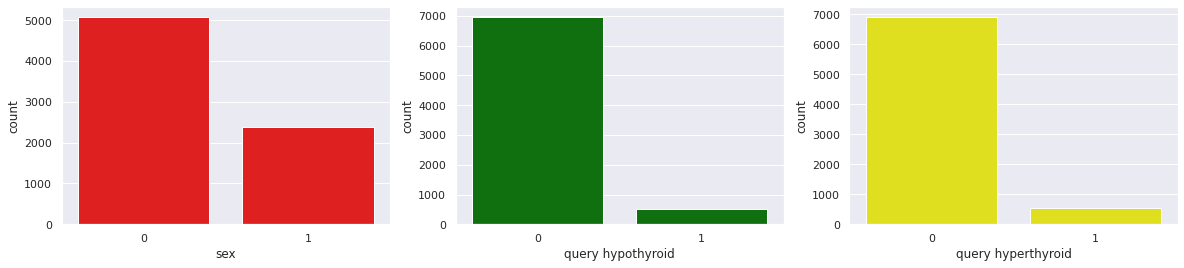

In [730]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(data['sex'], color='red')

f.add_subplot(1,3,2)
sns.countplot(data['query hypothyroid'], color='green')

f.add_subplot(1,3,3)
sns.countplot(data['query hyperthyroid'], color='yellow')

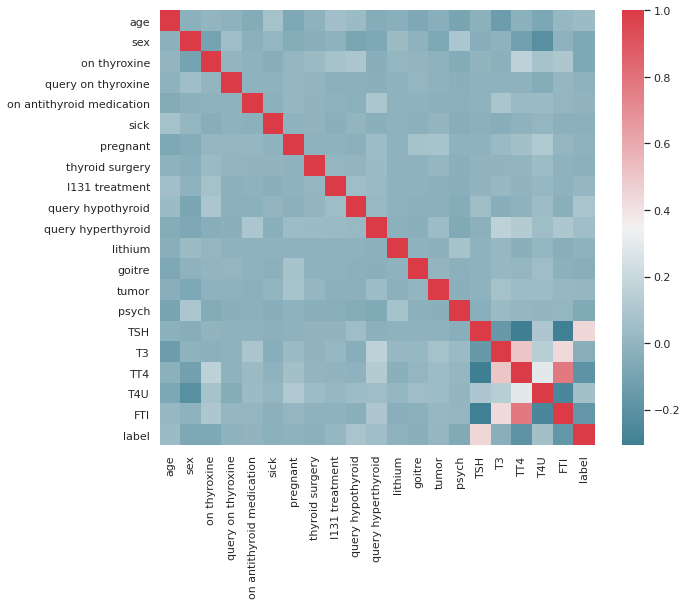

In [732]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


### **4. CART DENGAN GINI INDEX**

In [807]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X=data.iloc[:,0:20].values
#Label Set

y=data.iloc[:,20].values


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=100)

model=DecisionTreeClassifier(criterion='gini', splitter='best',random_state=100)
'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model.fit(X_train,y_train)

y_trained = model.predict(X_train)
accuracy_score_train = accuracy_score(y_trained, y_train)
print("Akurasi Score Data Train: ", accuracy_score_train)

y_tested = model.predict(X_test)
accuracy_score_tested = accuracy_score(y_test, y_tested)
print("Akurasi Score Data Test: ", accuracy_score_tested)

conf_mat = confusion_matrix(y_test, y_tested)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_tested))


print ('Accuracy Score : ' + str(accuracy_score(y_test,y_tested)))
print("Precision Score : ",precision_score(y_test, y_tested,average='weighted'))
print("Recall Score : ",recall_score(y_test, y_tested,average='weighted'))
print('F1 Score : ' + str(f1_score(y_test,y_tested,average='weighted')))

Akurasi Score Data Train:  1.0
Akurasi Score Data Test:  0.9814914163090128
Confusion Matrix: 
 [[3318   31    6]
 [  16   72    0]
 [  16    0  269]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3355
           1       0.70      0.82      0.75        88
           2       0.98      0.94      0.96       285

    accuracy                           0.98      3728
   macro avg       0.89      0.92      0.90      3728
weighted avg       0.98      0.98      0.98      3728

Accuracy Score : 0.9814914163090128
Precision Score :  0.9826310676219381
Recall Score :  0.9814914163090128
F1 Score : 0.9819268760990988


DecisionTree Feature ranking:
1. feature TSH (0.706425)
2. feature FTI (0.144680)
3. feature TT4 (0.068223)
4. feature T3 (0.039699)
5. feature age (0.010924)
6. feature T4U (0.009489)
7. feature thyroid surgery (0.005158)
8. feature on antithyroid medication (0.004998)
9. feature query hyperthyroid (0.004554)
10. feature pregnant (0.001719)
11. feature on thyroxine (0.001683)
12. feature tumor (0.001255)
13. feature lithium (0.000927)
14. feature query on thyroxine (0.000269)
15. feature psych (0.000000)
16. feature goitre (0.000000)
17. feature I131 treatment (0.000000)
18. feature sick (0.000000)
19. feature sex (0.000000)
20. feature query hypothyroid (0.000000)


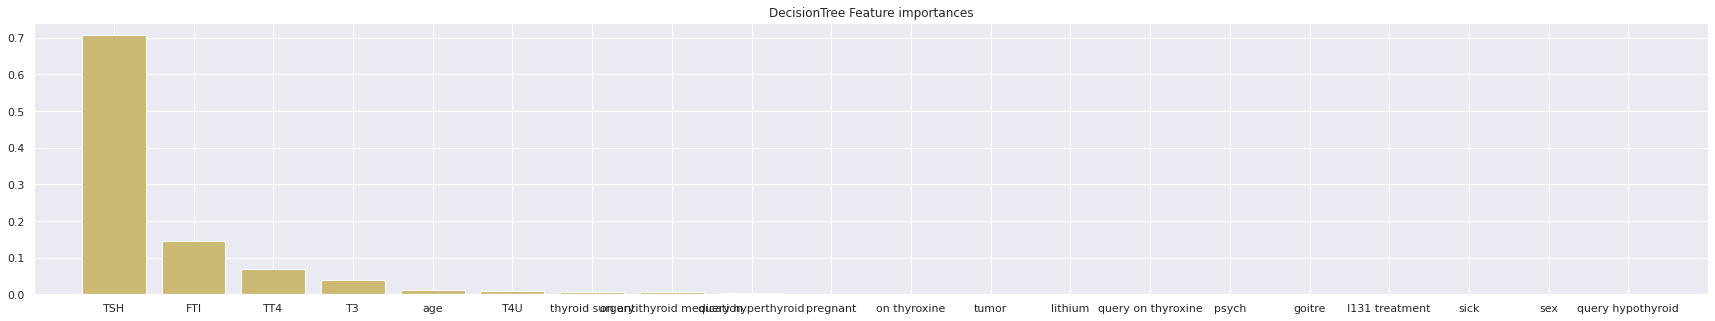

In [734]:
print("DecisionTree Feature ranking:")

importance = model.feature_importances_
indices = np.argsort(importance)[::-1]

X=data.iloc[:,0:20].values

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, data.columns[indices[f]], importance[indices[f]]))

plt.figure(figsize=(30,5))
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importance[indices], color="y", align="center")
plt.xticks(range(X.shape[1]), data.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()


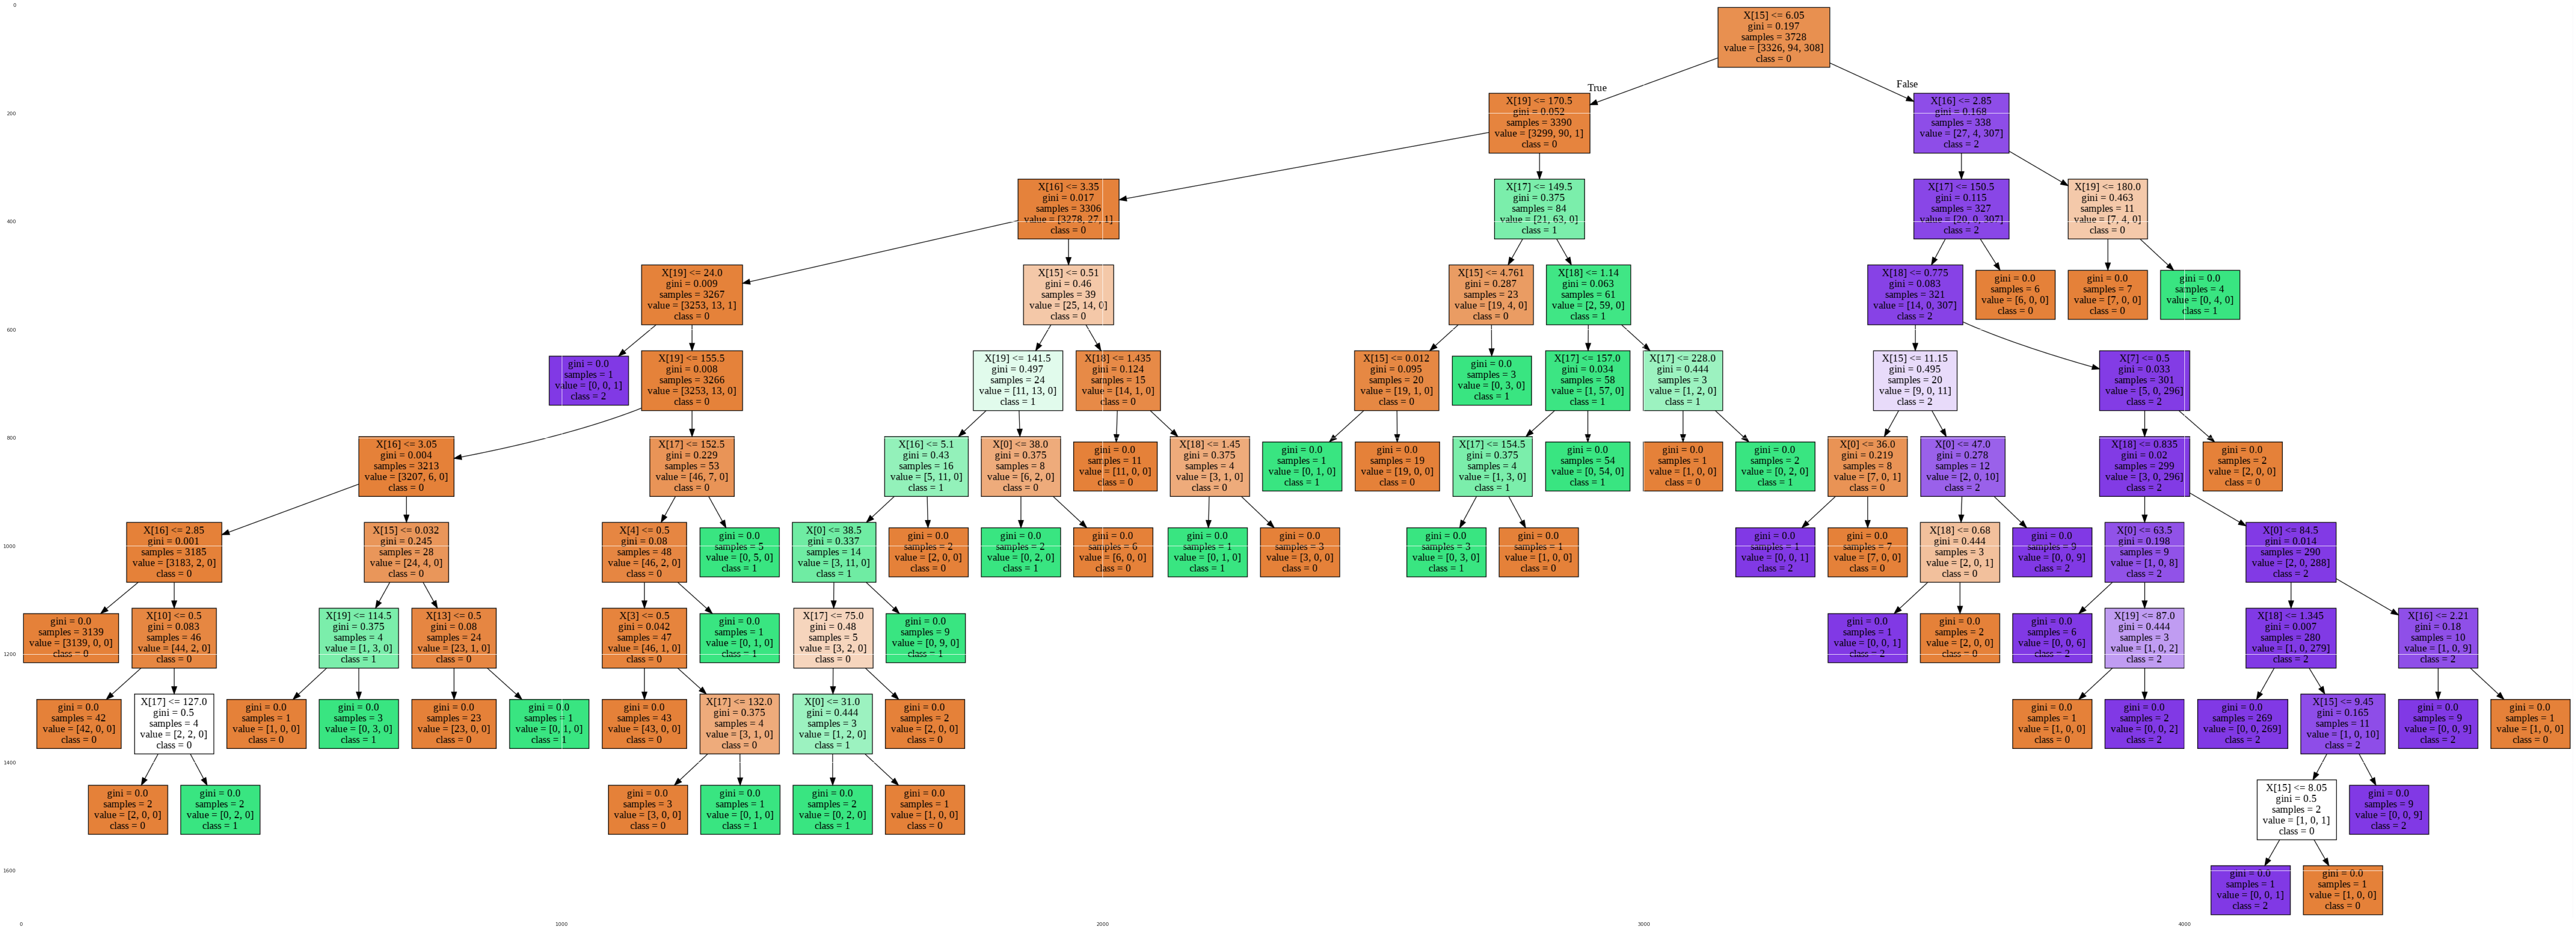

In [808]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys

rt = model.fit(X_train, y_train)

str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True, class_names = '012')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

## **5. TREE PRUNING**

In [809]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(ccp_alphas)

[0.         0.00017819 0.00021175 0.00025036 0.00025945 0.00026253
 0.00032189 0.00035743 0.00035765 0.00040236 0.00046942 0.00050319
 0.00050966 0.00051413 0.00053648 0.00060019 0.00061205 0.00067619
 0.00104455 0.00107985 0.00111732 0.00126306 0.00129202 0.00136559
 0.00188973 0.00260337 0.00289021 0.00383805 0.00563907 0.0241753
 0.13377536]


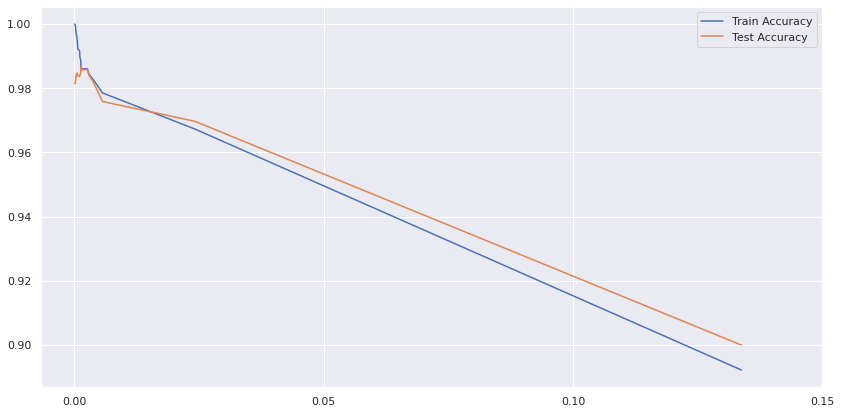

[1.0, 0.9997317596566524, 0.9991952789699571, 0.9989270386266095, 0.9983905579399142, 0.9981223175965666, 0.9975858369098712, 0.9970493562231759, 0.9967811158798283, 0.9965128755364807, 0.996244635193133, 0.9959763948497854, 0.9957081545064378, 0.9954399141630901, 0.9951716738197425, 0.9943669527896996, 0.9938304721030042, 0.9922210300429185, 0.9916845493562232, 0.9900751072961373, 0.989538626609442, 0.9887339055793991, 0.9871244635193133, 0.9860515021459227, 0.9860515021459227, 0.9860515021459227, 0.9844420600858369, 0.9825643776824035, 0.9785407725321889, 0.967274678111588, 0.8921673819742489]
[0.9814914163090128, 0.9814914163090128, 0.9822961373390557, 0.9825643776824035, 0.9833690987124464, 0.983637339055794, 0.983637339055794, 0.983637339055794, 0.983637339055794, 0.9841738197424893, 0.9844420600858369, 0.9844420600858369, 0.9844420600858369, 0.9847103004291845, 0.9847103004291845, 0.9847103004291845, 0.9844420600858369, 0.9839055793991416, 0.983637339055794, 0.983637339055794, 0.

'clfs = []\nfor ccp_alpha in ccp_alphas:\n    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)\n    clf.fit(X_train, y_train)\n    clfs.append(clf)\nprint("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(\n      clfs[-1].tree_.node_count, ccp_alphas[-1]))'

In [810]:
tree_list = []
accuracy_train,accuracy_test=[],[]

for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(criterion='gini',random_state=100,ccp_alpha=alpha)
    
    tree.fit(X_train,y_train)
    y_trained=tree.predict(X_train)
    y_tested=tree.predict(X_test)
    tree_list.append(tree)

    accuracy_train.append(accuracy_score(y_train,y_trained))
    accuracy_test.append(accuracy_score(y_test,y_tested))
    
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=ccp_alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=ccp_alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.2,0.05))
plt.show()

print(accuracy_train)
print(accuracy_test)
    
'''clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))'''

In [811]:
training_score = [tree.score(X_train,y_train) for tree in tree_list]
testing_score = [tree.score(X_test,y_test) for tree in tree_list]

print(training_score)
print(testing_score)

[1.0, 0.9997317596566524, 0.9991952789699571, 0.9989270386266095, 0.9983905579399142, 0.9981223175965666, 0.9975858369098712, 0.9970493562231759, 0.9967811158798283, 0.9965128755364807, 0.996244635193133, 0.9959763948497854, 0.9957081545064378, 0.9954399141630901, 0.9951716738197425, 0.9943669527896996, 0.9938304721030042, 0.9922210300429185, 0.9916845493562232, 0.9900751072961373, 0.989538626609442, 0.9887339055793991, 0.9871244635193133, 0.9860515021459227, 0.9860515021459227, 0.9860515021459227, 0.9844420600858369, 0.9825643776824035, 0.9785407725321889, 0.967274678111588, 0.8921673819742489]
[0.9814914163090128, 0.9814914163090128, 0.9822961373390557, 0.9825643776824035, 0.9833690987124464, 0.983637339055794, 0.983637339055794, 0.983637339055794, 0.983637339055794, 0.9841738197424893, 0.9844420600858369, 0.9844420600858369, 0.9844420600858369, 0.9847103004291845, 0.9847103004291845, 0.9847103004291845, 0.9844420600858369, 0.9839055793991416, 0.983637339055794, 0.983637339055794, 0.

In [812]:
model_list = pd.DataFrame({'alpha':ccp_alphas,'train score':training_score,'test score':testing_score})
model_list['score diff'] = model_list['train score'] - model_list['test score']

In [813]:
model_list.head()

,alpha,train score,test score,score diff
0,0.000000,1.000000,0.981491,0.018509
1,0.000178,0.999732,0.981491,0.018240
2,0.000212,0.999195,0.982296,0.016899
3,0.000250,0.998927,0.982564,0.016363
4,0.000259,0.998391,0.983369,0.015021


In [814]:
model_list[model_list['score diff']==model_list['score diff'].min()]

,alpha,train score,test score,score diff
30,0.133775,0.892167,0.899946,-0.007779


In [815]:
model_list[model_list['test score']==model_list['test score'].max()]

,alpha,train score,test score,score diff
22,0.001292,0.987124,0.986856,0.000268


In [816]:
model_pruned=DecisionTreeClassifier(ccp_alpha=0.001292, criterion='gini',splitter='best')

'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_trained)
print("Akurasi Score Data Train: ", accuracy_score_train)

y_tested = model_pruned.predict(X_test)
accuracy_score_tested = accuracy_score(y_test, y_tested)
print("Akurasi Score Data Test: ", accuracy_score_tested)

conf_mat = confusion_matrix(y_test, y_tested)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_tested))

print ('Accuracy Score : ' + str(accuracy_score(y_test,y_tested)))
print("Precision Score : ",precision_score(y_test, y_tested,average='weighted'))
print("Recall Score : ",recall_score(y_test, y_tested,average='weighted'))
print('F1 Score : ' + str(f1_score(y_test,y_tested,average='weighted')))

Akurasi Score Data Train:  0.9887339055793991
Akurasi Score Data Test:  0.9833690987124464
Confusion Matrix: 
 [[3329   17    9]
 [  27   61    0]
 [   9    0  276]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3355
           1       0.78      0.69      0.73        88
           2       0.97      0.97      0.97       285

    accuracy                           0.98      3728
   macro avg       0.91      0.88      0.90      3728
weighted avg       0.98      0.98      0.98      3728

Accuracy Score : 0.9833690987124464
Precision Score :  0.9828131696555225
Recall Score :  0.9833690987124464
F1 Score : 0.9830259736447322


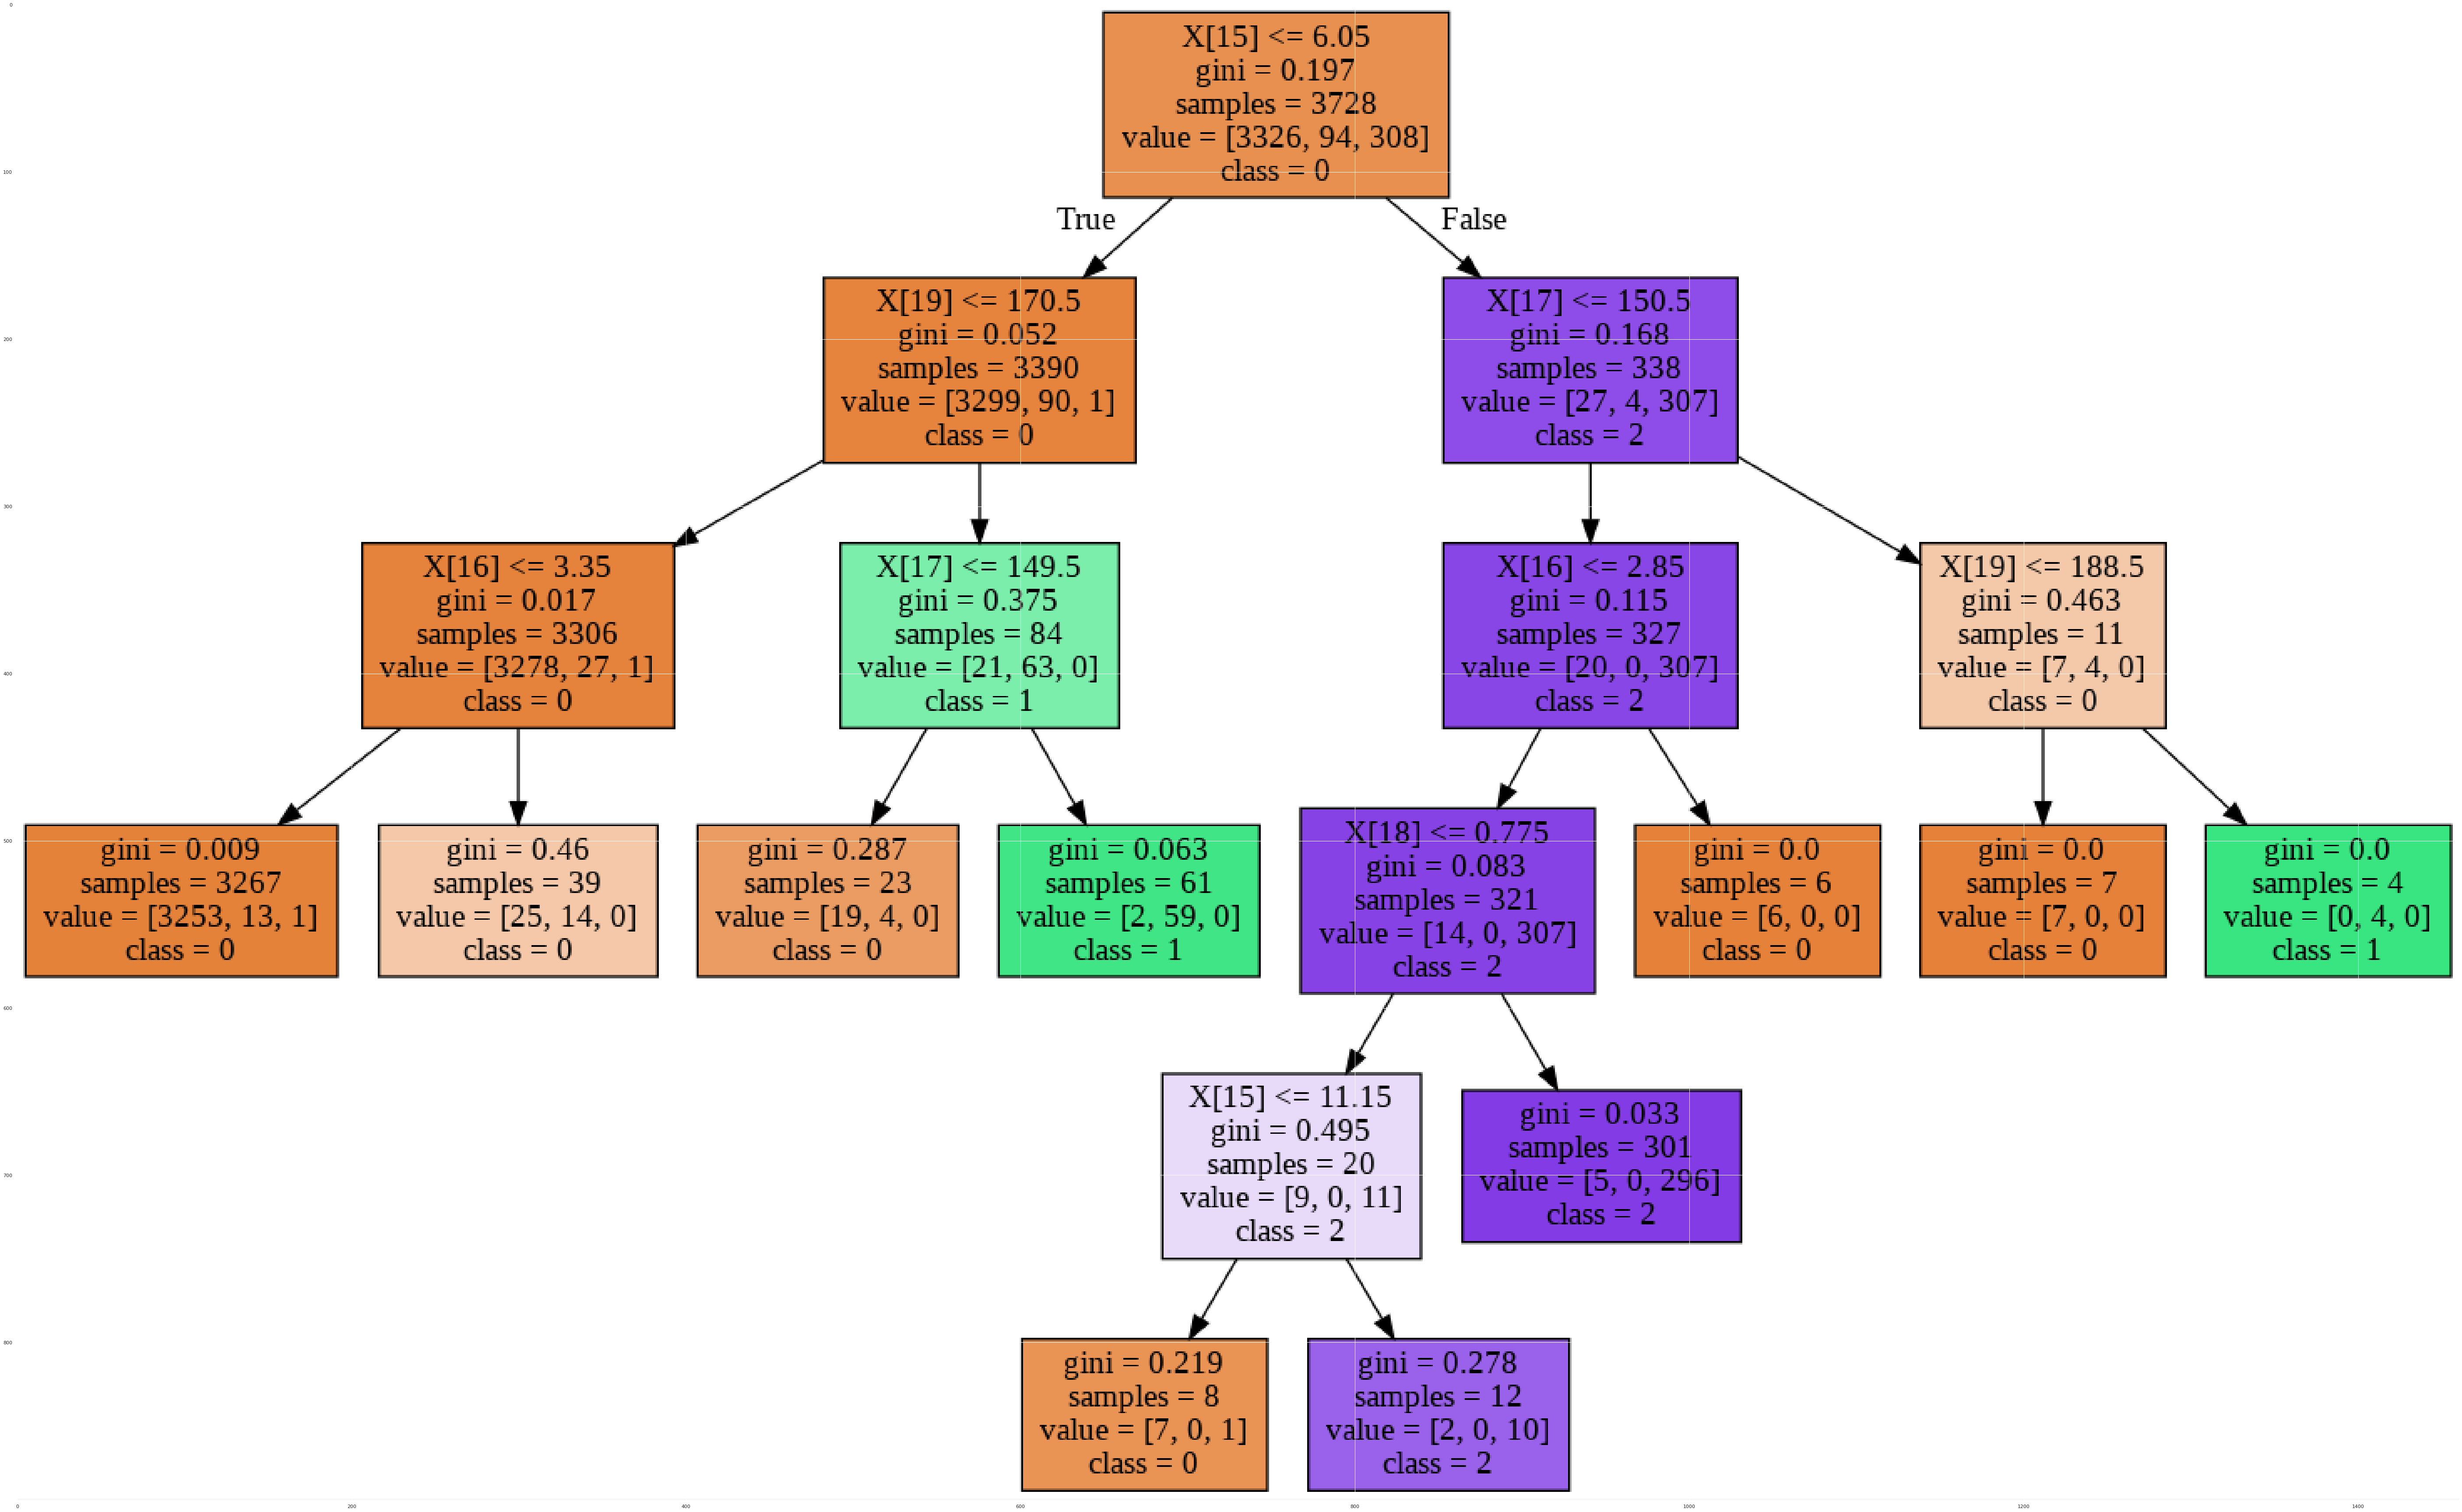

In [817]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys

rt = model_pruned.fit(X_train, y_train)

str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True, class_names = '012')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

###**6. GRID SEARCH VALIDATION**



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,8)}
model_pruned = GridSearchCV(DecisionTreeClassifier(ccp_alpha=0.000647, criterion='gini',splitter='best'), parameters, cv=3)
model_pruned.fit(X=X_train, y=y_train)
tree_model = model_pruned.best_estimator_
print (model_pruned.best_score_, model_pruned.best_params_)

In [ ]:
model_pruned=DecisionTreeClassifier(ccp_alpha=0.000647, criterion='gini',splitter='best')

'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_trained)
print("Akurasi Score Data Train: ", accuracy_score_train)

In [ ]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys

rt = model_pruned.fit(X_train, y_train)

str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True, class_names = '01')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

In [ ]:
datates=pd.read_csv('https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Datatest.data')

datates.drop('no', inplace=True, axis=1)
datates.drop('hypopituitary', inplace=True, axis=1)

X_test1=datates.iloc[:,0:20].values
#Label Set
y_test1=datates.iloc[:,20].values

y_tested1 = model_pruned.predict(X_test1)
accuracy_score_tested1 = accuracy_score(y_test1, y_tested1)
print("Akurasi Score Data Test: ", accuracy_score_tested1)

conf_mat = confusion_matrix(y_test1, y_tested1)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test1, y_tested1))

print ('Accuracy Score : ' + str(accuracy_score(y_test1,y_tested1)))
print ('Precision Score : ' + str(precision_score(y_test1,y_tested1)))
print ('Recall Score : ' + str(recall_score(y_test1,y_tested1)))
print('F1 Score : ' + str(f1_score(y_test1,y_tested1)))